In [3]:
# Packages
import numpy as np
import pandas as pd
from abc_analysis import abc_analysis


In [4]:
Data = pd.read_csv("C:/Users/santh/Desktop/Project/Sales_Data1.csv")
Data.head()

,sl_no,Invoice,StockCode,Description,Quantity,InvoiceDate,Date,Time,Price,Customer ID,Country,Total_price,gender,Age
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.95,13085,United Kingdom,83.4,male,22
1,1,489434,79323P,PINK CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12-01-2009 07:45,01-12-2009,07:45:00,2.10,13085,United Kingdom,100.8,male,22
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12-01-2009 07:45,01-12-2009,07:45:00,1.25,13085,United Kingdom,30.0,male,22


In [5]:
Data['InvoiceDate'] = pd.to_datetime(Data['InvoiceDate'])

In [6]:
#remove canceled orders
Data = Data[Data['Quantity']>0]
Data.shape

(824364, 14)

In [7]:
#remove rows where customerID are NA
Data.dropna(subset=['Customer ID'],how='all',inplace=True)
Data.shape

(824364, 14)

In [8]:
#restrict the data to one full year because it's better to use a metric per Months or Years in RFM
Data = retail_ger[retail_ger['InvoiceDate']>= "2010-01-01"]
Data.shape

(792604, 14)

In [9]:
Data.head()

,sl_no,Invoice,StockCode,Description,Quantity,InvoiceDate,Date,Time,Price,Customer ID,Country,Total_price,gender,Age
31760,31760,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,04-01-2010,09:24:00,4.50,12346,United Kingdom,22.50,male,34
31761,31761,C493411,21539,RETRO SPOTS BUTTER DISH,1,2010-01-04 09:43:00,04-01-2010,09:43:00,4.25,14590,United Kingdom,4.25,male,58
31762,31762,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,04-01-2010,09:53:00,4.50,12346,United Kingdom,22.50,male,34
31763,31763,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,04-01-2010,10:28:00,2.55,14590,United Kingdom,91.80,male,58
31764,31764,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,04-01-2010,10:28:00,4.25,14590,United Kingdom,51.00,male,58


In [7]:
retail_ger = retail_ger.groupby('InvoiceDate')['Total_price'].sum().reset_index()

In [8]:
retail_ger = retail_ger.set_index('InvoiceDate')
retail_ger

,Total_price
InvoiceDate,
2010-01-04 09:24:00,22.50
2010-01-04 09:43:00,4.25
2010-01-04 09:53:00,22.50
2010-01-04 10:28:00,290.20
2010-01-04 10:33:00,23.85
...,...
2011-12-09 12:23:00,124.60
2011-12-09 12:25:00,140.64
2011-12-09 12:31:00,329.05


In [17]:
y =retail_ger['Total_price'].resample('MS').sum()

In [18]:
y['2010':]

InvoiceDate
2010-01-01     582685.222
2010-02-01     523342.546
2010-03-01     763221.501
2010-04-01     628583.362
2010-05-01     640047.030
2010-06-01     706673.250
2010-07-01     620487.580
2010-08-01     621228.840
2010-09-01     882196.701
2010-10-01    1108370.220
2010-11-01    1209792.802
2010-12-01     909956.410
2011-01-01     663815.700
2011-02-01     457728.550
2011-03-01     611036.910
2011-04-01     512352.871
2011-05-01     708938.040
2011-06-01     714414.220
2011-07-01     625943.541
2011-08-01     674319.800
2011-09-01     974236.392
2011-10-01    1104033.990
2011-11-01    1191227.020
2011-12-01     693897.200
Freq: MS, Name: Total_price, dtype: float64

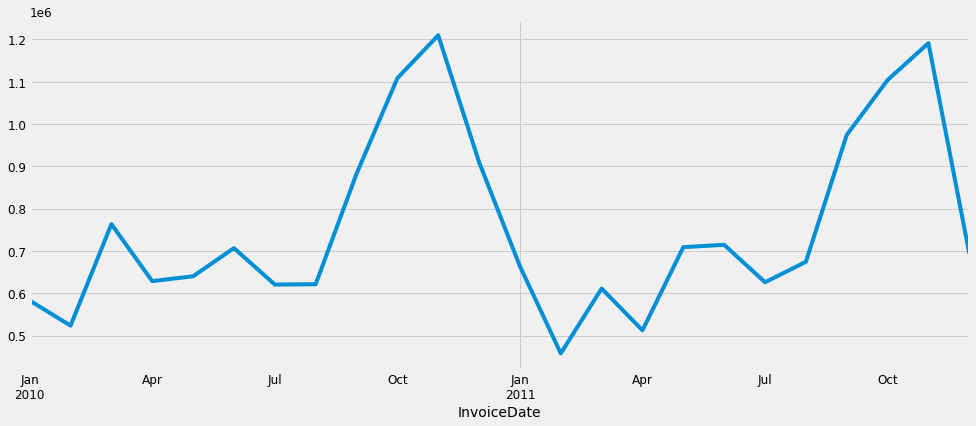

In [19]:
y.plot(figsize=(15, 6))
plt.show()

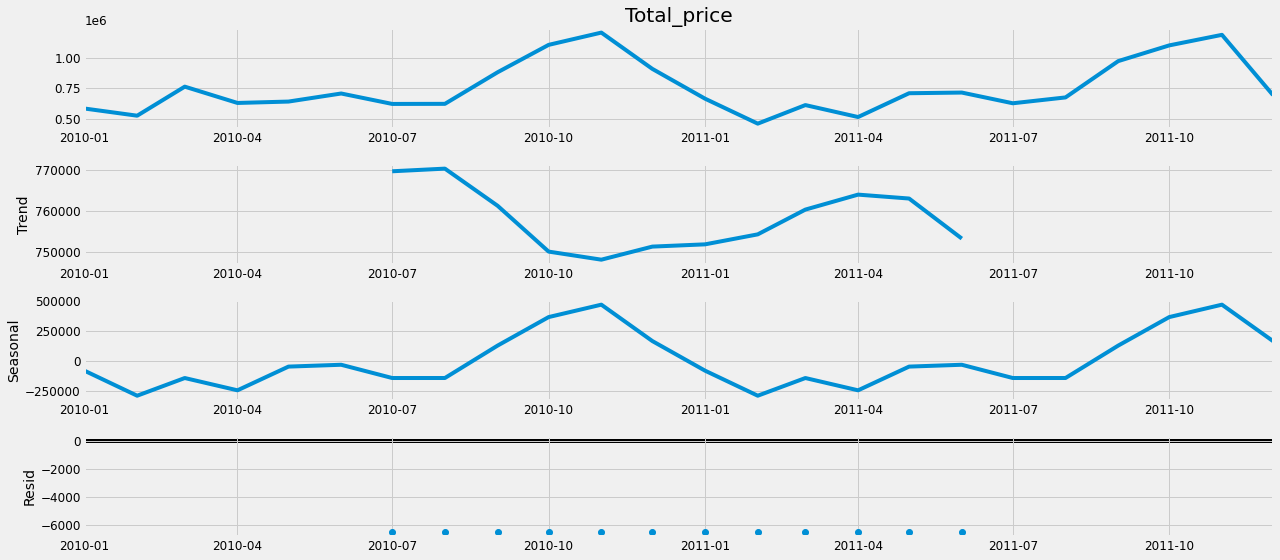

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA

In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:692.0889347984166
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:295.8376290195942
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:289.56512774483423
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:312.5959918663066
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:297.83748818172444
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:645.9011172793633
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:316.06011243282546
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:261.50190698293534
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:383.00866344599996
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:316.1675752827249
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:600.9182785210133
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:268.1078101244079
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:263.4722379135961
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - A

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5026         -0       -inf      0.000       2.503       2.503
ma.L1         -2.8542         -0        inf      0.000      -2.854      -2.854
ar.S.L12            0         -0        nan        nan           0           0
sigma2      9.206e+09         -0       -inf      0.000    9.21e+09    9.21e+09


In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1152x576 with 0 Axes>

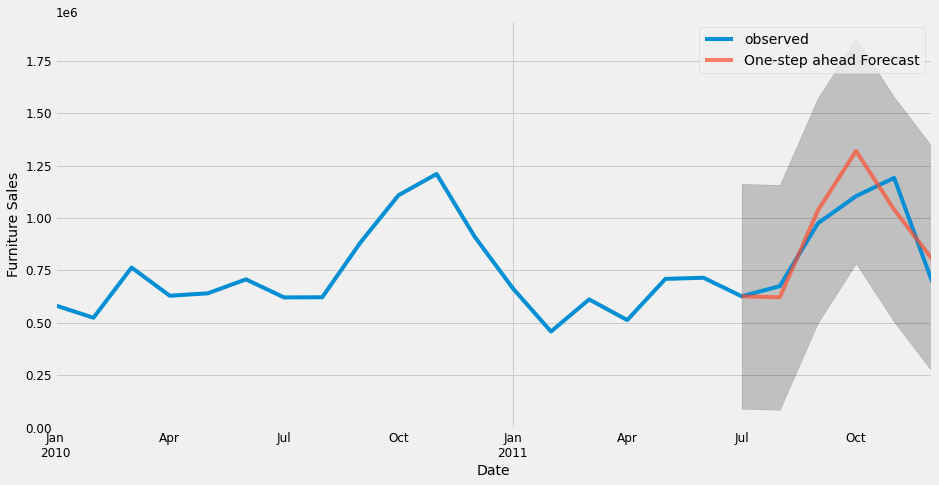

In [25]:
pred = results.get_prediction(start=pd.to_datetime('2011-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y['2011-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 14638366156.61


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 120989.12


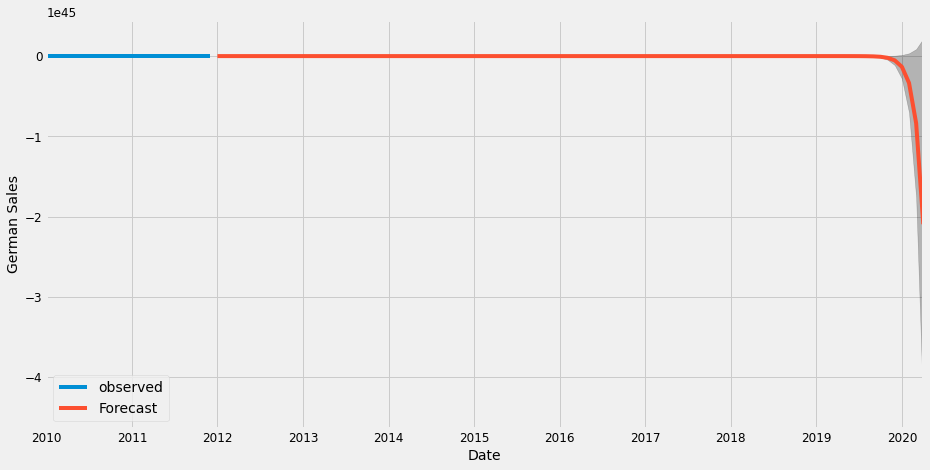

In [28]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('German Sales')
plt.legend()
plt.show()